In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib import font_manager, rc, cm
import matplotlib as mpl

# 마이너스 깨짐 현상 해결
mpl.rcParams['axes.unicode_minus'] = False
# 한글 폰트 설정
plt.rcParams['font.family'] = 'NanumGothic'

In [2]:
path = '../datasets/ML_data/'

X_train_raw = pd.read_csv(path+'census_X_train.csv')
X_test_raw = pd.read_csv(path+'census_X_test.csv')
y_train_raw = pd.read_csv(path+'census_y_train.csv')

X_train = X_train_raw.copy()
X_test = X_test_raw.copy()
y_train = y_train_raw.copy()

In [3]:
print(X_train.shape)
X_train.tail(5)

(30162, 12)


,age,workclass,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country
30157,27,Private,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States
30158,40,Private,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States
30159,58,Private,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States
30160,22,Private,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States
30161,52,Self-emp-inc,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States


In [4]:
print(X_test.shape)
X_test.head(2)

(15060, 12)


,age,workclass,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country
0,25,Private,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States
1,38,Private,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States


In [5]:
print(y_train.shape)
y_train.tail(5)

(30162, 1)


,target
30157,0
30158,1
30159,0
30160,0
30161,1


5만불이 넘으면 1, 안넘으면 0

# EDA

In [6]:
# 각 데이터셋의 결측치 확인
print(X_train.isnull().sum())
print(X_test.isnull().sum())

age               0
workclass         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
dtype: int64
age               0
workclass         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
dtype: int64


In [7]:
X_train.describe(include='all')

,age,workclass,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country
count,30162.000000,30162,30162.000000,30162,30162,30162,30162,30162,30162.000000,30162.000000,30162.000000,30162
unique,NaN,7,NaN,7,14,6,5,2,NaN,NaN,NaN,41
top,NaN,Private,NaN,Married-civ-spouse,Prof-specialty,Husband,White,Male,NaN,NaN,NaN,United-States
freq,NaN,22286,NaN,14065,4038,12463,25933,20380,NaN,NaN,NaN,27504
mean,38.437902,NaN,10.121312,NaN,NaN,NaN,NaN,NaN,1092.007858,88.372489,40.931238,NaN
std,13.134665,NaN,2.549995,NaN,NaN,NaN,NaN,NaN,7406.346497,404.298370,11.979984,NaN
min,17.000000,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,1.000000,NaN
25%,28.000000,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN
50%,37.000000,NaN,10.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN
75%,47.000000,NaN,13.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,45.000000,NaN


capital_gain, capital_loss 의 요약 통계량이 특이함. >> 확인하기

## capital_gain, capital_loss
* capital_gain : 자본 이익
* capital_loss : 지본 손익

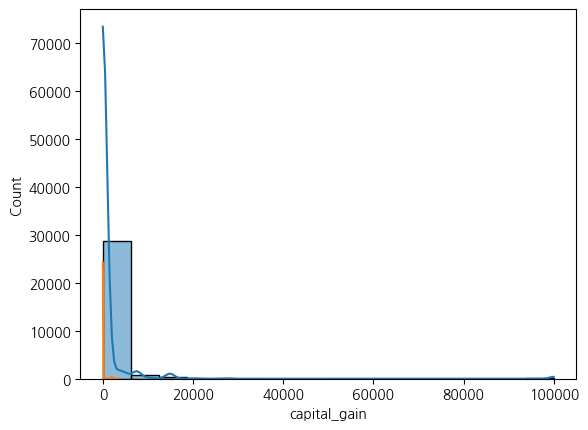

In [8]:
# capital_gain, capital_loss 분포 확인
sns.histplot(data=X_train.capital_gain, kde=True)
sns.histplot(data=X_test.capital_loss, kde=True)
plt.show()

In [9]:
X_train.capital_gain.quantile(0.95)

5013.0

In [10]:
X_train.capital_gain.quantile([q/20 for q in range(15, 21)])

0.75        0.0
0.80        0.0
0.85        0.0
0.90        0.0
0.95     5013.0
1.00    99999.0
Name: capital_gain, dtype: float64

In [11]:
X_train.capital_loss.quantile([q/20 for q in range(15, 21)])

0.75       0.0
0.80       0.0
0.85       0.0
0.90       0.0
0.95       0.0
1.00    4356.0
Name: capital_loss, dtype: float64

너무 분포의 차이가 심해서 범주형 변수로 바꾸려고 한다.

In [12]:
# capital_gain이 0보다 크면 1, 아니면 0
X_train['capital_gain_label'] = np.where(X_train.capital_gain > 0, 1, 0)
X_train['capital_loss_label'] = np.where(X_train.capital_loss > 0, 1, 0)

X_test['capital_gain_label'] = np.where(X_test.capital_gain > 0, 1, 0)
X_test['capital_loss_label'] = np.where(X_test.capital_loss > 0, 1, 0)

In [13]:
X_train.head(2)

,age,workclass,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,capital_gain_label,capital_loss_label
0,39,State-gov,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,1,0
1,50,Self-emp-not-inc,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0,0


In [14]:
# 일단 독립변수 + 종속변수
train = pd.concat([X_train, y_train], axis=1)
print(train.shape)
train.head(2)

(30162, 15)


,age,workclass,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,capital_gain_label,capital_loss_label,target
0,39,State-gov,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,1,0,0
1,50,Self-emp-not-inc,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0,0,0


In [15]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30162 entries, 0 to 30161
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   age                 30162 non-null  int64 
 1   workclass           30162 non-null  object
 2   education_num       30162 non-null  int64 
 3   marital_status      30162 non-null  object
 4   occupation          30162 non-null  object
 5   relationship        30162 non-null  object
 6   race                30162 non-null  object
 7   sex                 30162 non-null  object
 8   capital_gain        30162 non-null  int64 
 9   capital_loss        30162 non-null  int64 
 10  hours_per_week      30162 non-null  int64 
 11  native_country      30162 non-null  object
 12  capital_gain_label  30162 non-null  int32 
 13  capital_loss_label  30162 non-null  int32 
 14  target              30162 non-null  int64 
dtypes: int32(2), int64(6), object(7)
memory usage: 3.2+ MB


In [16]:
# 컬럼 분리하기 - 숫자형과 범주형 데이터의 전처리 과정이 다르다.
num_col = ['age', 'education_num', 'hours_per_week', 'capital_gain', 'capital_loss']
cat_col = ['workclass', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'native_country', 'capital_gain_label', 'capital_loss_label']
y_col = ['target']

In [17]:
for col in num_col:
    print(col)
    print(train.groupby('target')[col].describe())
    print('='*10)

age
          count      mean        std   min   25%   50%   75%   max
target                                                            
0       22654.0  36.60806  13.464631  17.0  26.0  34.0  45.0  90.0
1        7508.0  43.95911  10.269633  19.0  36.0  43.0  51.0  90.0
education_num
          count       mean       std  min   25%   50%   75%   max
target                                                           
0       22654.0   9.629116  2.413596  1.0   9.0   9.0  10.0  16.0
1        7508.0  11.606420  2.368423  2.0  10.0  12.0  13.0  16.0
hours_per_week
          count       mean        std  min   25%   50%   75%   max
target                                                            
0       22654.0  39.348592  11.950774  1.0  38.0  40.0  40.0  99.0
1        7508.0  45.706580  10.736987  1.0  40.0  40.0  50.0  99.0
capital_gain
          count         mean           std  min  25%  50%  75%      max
target                                                                 
0       22

In [18]:
train.groupby('education_num')['target'].mean().sort_values(ascending=False)

education_num
15    0.749077
16    0.746667
14    0.564229
13    0.421491
11    0.263198
12    0.253968
10    0.200060
9     0.164329
8     0.076923
6     0.071951
4     0.062837
7     0.056298
5     0.054945
3     0.041667
2     0.039735
1     0.000000
Name: target, dtype: float64

In [19]:
# 이걸로 인사이트를 조금이나마 얻을 수 있음.
for col in train[cat_col]:
    print(train.groupby(col)['target'].mean().sort_values(ascending=False))

workclass
Self-emp-inc        0.558659
Federal-gov         0.387063
Local-gov           0.294630
Self-emp-not-inc    0.285714
State-gov           0.268960
Private             0.218792
Without-pay         0.000000
Name: target, dtype: float64
marital_status
Married-AF-spouse        0.476190
Married-civ-spouse       0.454959
Divorced                 0.107262
Widowed                  0.096735
Married-spouse-absent    0.083784
Separated                0.070288
Never-married            0.048324
Name: target, dtype: float64
occupation
Exec-managerial      0.485220
Prof-specialty       0.448489
Protective-serv      0.326087
Tech-support         0.304825
Sales                0.270647
Craft-repair         0.225310
Transport-moving     0.202926
Adm-clerical         0.133835
Machine-op-inspct    0.124619
Farming-fishing      0.116279
Armed-Forces         0.111111
Handlers-cleaners    0.061481
Other-service        0.041096
Priv-house-serv      0.006993
Name: target, dtype: float64
relationship
Wif

# 데이터 전처리
* 변수가 많기 때문에 일단 원핫인코딩보다는 라벨인코딩을 하는 방향으로 간다.

In [20]:
# train과 test 합치기
X = pd.concat([X_train, X_test])

In [21]:
# 라벨 인코딩
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

for col in cat_col[:-2]:
    encoder.fit(X[col])
    X_train[f'{col}_label'] = encoder.transform(X_train[col])
    X_test[f'{col}_label'] = encoder.transform(X_test[col])

In [22]:
# 데이터 정규화 - 스케일링
# 연속형 데이터
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

for col in num_col:
    scaler.fit(X[[col]])
    X_train[[f'{col}_scaled']] = scaler.transform(X_train[[col]])
    X_test[[f'{col}_scaled']] = scaler.transform(X_test[[col]])

In [23]:
# 인코딩 한 것 확인기기
X_train.head(2)

,age,workclass,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,...,occupation_label,relationship_label,race_label,sex_label,native_country_label,age_scaled,education_num_scaled,hours_per_week_scaled,capital_gain_scaled,capital_loss_scaled
0,39,State-gov,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,...,0,1,4,1,38,0.034201,1.128753,-0.078120,0.142888,-0.21878
1,50,Self-emp-not-inc,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,...,3,0,4,1,38,0.866417,1.128753,-2.326738,-0.146733,-0.21878


In [24]:
X_train.columns

Index(['age', 'workclass', 'education_num', 'marital_status', 'occupation',
       'relationship', 'race', 'sex', 'capital_gain', 'capital_loss',
       'hours_per_week', 'native_country', 'capital_gain_label',
       'capital_loss_label', 'workclass_label', 'marital_status_label',
       'occupation_label', 'relationship_label', 'race_label', 'sex_label',
       'native_country_label', 'age_scaled', 'education_num_scaled',
       'hours_per_week_scaled', 'capital_gain_scaled', 'capital_loss_scaled'],
      dtype='object')

In [25]:
# 진짜 사용할 독립변수명 추출
features = ['capital_gain_label',
       'capital_loss_label', 'workclass_label', 'marital_status_label',
       'occupation_label', 'relationship_label', 'race_label', 'sex_label',
       'native_country_label', 'age_scaled', 'education_num_scaled',
       'hours_per_week_scaled', 'capital_gain_scaled', 'capital_loss_scaled']

light / xgb

In [26]:
# 모델링 (모형 구축)
# 분석 데이터셋 구축
from sklearn.model_selection import train_test_split

X_tr, X_val, y_tr, y_val = \
train_test_split(X_train[features], y_train, test_size=0.3, random_state=42)

print(X_tr.shape, y_tr.shape, X_val.shape, y_val.shape)

(21113, 14) (21113, 1) (9049, 14) (9049, 1)


선형모델을 사용하지 않는 이유
* 범주형 데이터를 라벨인코딩해줌. >> 선형성이 나오지 않음.
* 범주형 데이터는 분류모델을 사용할 때는 의미가 있음. >> 빈도수 !

RandomForest 하이퍼 파라미터
* n_estimators : 결정트리계수 (default=100)
* max_depth : 트리 깊이 최댓값 (default=None) -> 많이 하면 과적합, 적게 하면 과소적합
* max_features : 최적 분리를 위해 고려해야 할 변수의 개수 (default=auto)

==> 여기까지는 무조건 설정 !
* min_samples_split : node 분리에 필요한 최소 샘플 수 (default=2)
* min_samples_leaf : leaf node에 필요한 최소 샘플 수 (default=1)

In [27]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X_tr, y_tr.values.ravel())

RandomForestClassifier()

XGBClassifier 하이퍼 파라미터
* n_estimators : boosting할 결정트리계수 (default=100)
* max_depth : 트리 깊이 최댓값 (default=None) -> 많이 하면 과적합, 적게 하면 과소적합
* learning_rate : 학습률 (default=0.1)
* lambda : L2 규제(알아야함!)
* alpha : L1 규제

==> 여기까지는 무조건 설정 !
* min_child_weight : child node에 필요한 가중치 합의 최솟값 (default=1)
* subsample : 각 트리에 사용할 데이터 샘플의 비율 (0.5 or 1) (default=1)
* colsample_bytree : 각 트리 생성 시, 사용되는 feature

L1 규제
* 가중치의 절댓값의 합에 비례하는 패널티 부과
* 불필요한 가중치를 0으로

L2 규제
* 가중치의 제곱합에 비례하는 패널티 부과해 모델을 규제
* 가중치를 0에 가깝게 만들지만 완전히 0으로 만들지는 않는다. --> 모델의 일반화 성능 높여줌.
* 특성 간의 상관관계가 높은 경우에 유용하다.

In [58]:
# !pip3 install xgboost

In [28]:
from xgboost import XGBClassifier

xgb = XGBClassifier()
xgb.fit(X_tr, y_tr.values.ravel())

# 튜닝
xgb_tune = XGBClassifier(n_estimators=1000, learning_rate=0.1, max_depth=10, early_stopping_rounds=50, eval_metric='auc')
xgb_tune.fit(X_tr, y_tr.values.ravel(), eval_set=[(X_val, y_val)], verbose=10)

[0]	validation_0-auc:0.90598
[10]	validation_0-auc:0.91399
[20]	validation_0-auc:0.91793
[30]	validation_0-auc:0.92004
[40]	validation_0-auc:0.92176
[50]	validation_0-auc:0.92340
[60]	validation_0-auc:0.92414
[70]	validation_0-auc:0.92443
[80]	validation_0-auc:0.92433
[90]	validation_0-auc:0.92447
[100]	validation_0-auc:0.92432
[110]	validation_0-auc:0.92443
[120]	validation_0-auc:0.92457
[130]	validation_0-auc:0.92427
[140]	validation_0-auc:0.92416
[150]	validation_0-auc:0.92419
[160]	validation_0-auc:0.92397
[170]	validation_0-auc:0.92391


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=50,
              enable_categorical=False, eval_metric='auc', feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=10, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=1000, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [29]:
# ROC-AUC
from sklearn.metrics import roc_auc_score

pred_proba_rf = rf.predict_proba(X_val)
pred_proba_xgb = xgb.predict_proba(X_val)
pred_proba_xgb_tune = xgb_tune.predict_proba(X_val)

score_rf = roc_auc_score(y_val, pred_proba_rf[:, 1])
score_xgb = roc_auc_score(y_val, pred_proba_xgb[:, 1])
score_xgb_tune = roc_auc_score(y_val, pred_proba_xgb_tune[:, 1])

print('RandomForest\n>> {:.4f}'.format(score_rf))
print('XGBoost\n>> {:.4f}'.format(score_xgb))
print('XGBoost-tuning\n>> {:.4f}'.format(score_xgb_tune))

RandomForest
>> 0.8952
XGBoost
>> 0.9253
XGBoost-tuning
>> 0.9246


In [30]:
pd.DataFrame({'feature' : X_tr.columns,
              'rf_importance' : rf.feature_importances_,
              'xgb_importance' : xgb.feature_importances_,
              'xgb_tune_importance' : xgb_tune.feature_importances_})

,feature,rf_importance,xgb_importance,xgb_tune_importance
0,capital_gain_label,0.025340,0.038459,0.055087
1,capital_loss_label,0.006971,0.016630,0.024143
2,workclass_label,0.048859,0.019763,0.018513
3,marital_status_label,0.077139,0.179761,0.173297
4,occupation_label,0.088611,0.027331,0.021089
5,relationship_label,0.108925,0.299527,0.304129
6,race_label,0.017155,0.014590,0.015692
7,sex_label,0.011712,0.030877,0.021424
8,native_country_label,0.019896,0.010808,0.014103
9,age_scaled,0.220696,0.029899,0.023005


In [31]:
# 첫 번째 모델링 후 사용하지 않을 컬럼 삭제하고 다시 하기
del_col = ['capital_gain_label', 'capital_loss_label']

X_tr_v2 = X_tr.drop(columns=del_col)
X_val_v2 = X_val.drop(columns=del_col)

In [34]:
# GridSearchCV - 무조건 사용해야함!
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators' : [50, 100, 200],
    'max_depth' : [5, 10, 15],
    'min_samples_split' : [2, 5, 10],
    'min_samples_leaf' : [1, 2, 4]
}

rf_gridCV = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, verbose=1)
rf_gridCV.fit(X_tr_v2, y_tr.values.ravel())

Fitting 5 folds for each of 81 candidates, totalling 405 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [5, 10, 15],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             verbose=1)

In [35]:
# rf_gridCV 결과
pd.DataFrame(rf_gridCV.cv_results_).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,param_min_samples_split,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.729055,0.246590,0.035003,0.011391,5,1,2,50,"{'max_depth': 5, 'min_samples_leaf': 1, 'min_s...",0.847265,0.852948,0.842529,0.845334,0.844150,0.846445,0.003600,63
1,1.303826,0.158741,0.057787,0.019024,5,1,2,100,"{'max_depth': 5, 'min_samples_leaf': 1, 'min_s...",0.849870,0.850343,0.843003,0.845097,0.844387,0.846540,0.002993,60
2,3.121864,0.693748,0.143299,0.046110,5,1,2,200,"{'max_depth': 5, 'min_samples_leaf': 1, 'min_s...",0.849870,0.851291,0.843239,0.842729,0.842729,0.845971,0.003794,72
3,0.902500,0.209521,0.039601,0.013458,5,1,5,50,"{'max_depth': 5, 'min_samples_leaf': 1, 'min_s...",0.847265,0.850817,0.839451,0.845334,0.839413,0.844456,0.004463,81
4,1.329211,0.205224,0.051814,0.002136,5,1,5,100,"{'max_depth': 5, 'min_samples_leaf': 1, 'min_s...",0.848923,0.852711,0.843239,0.844150,0.843913,0.846587,0.003668,59


In [71]:
# best parameter
rf_gridCV.best_params_

{'max_depth': 15,
 'min_samples_leaf': 2,
 'min_samples_split': 10,
 'n_estimators': 100}

In [36]:
# best_estimator_
rf_best = rf_gridCV.best_estimator_

rf_best.fit(X_tr_v2, y_tr.values.ravel())

pred_proba_rf_best = rf_best.predict_proba(X_val_v2)
score_rf_best = roc_auc_score(y_val, pred_proba_rf_best[:, 1])

print('Best RandomForest Model Score\n>> {:.4f}'.format(score_rf_best))

Best RandomForest Model Score
>> 0.9175


In [ ]:
# GridSearchCV - 무조건 사용해야함!
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth' : [3, 5, 10, 15],
    'min_child_weight' : [1, 2],
    'colsample_bytree' : [0.6, 0.8],
    'subsample' : [0.6, 0.8]
}

xgb_gridCV = GridSearchCV(estimator=xgb_tune, param_grid=param_grid, cv=5, verbose=10)
xgb_gridCV.fit(X_tr_v2, y_tr.values.ravel(), eval_set=[(X_val_v2, y_val)])

Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV 1/5; 1/32] START colsample_bytree=0.6, max_depth=3, min_child_weight=1, subsample=0.6
[0]	validation_0-auc:0.80237
[1]	validation_0-auc:0.83839
[2]	validation_0-auc:0.86083
[3]	validation_0-auc:0.87403
[4]	validation_0-auc:0.87800
[5]	validation_0-auc:0.87999
[6]	validation_0-auc:0.88044
[7]	validation_0-auc:0.87965
[8]	validation_0-auc:0.88679
[9]	validation_0-auc:0.88788
[10]	validation_0-auc:0.89031
[11]	validation_0-auc:0.89025
[12]	validation_0-auc:0.89131
[13]	validation_0-auc:0.89212
[14]	validation_0-auc:0.89210
[15]	validation_0-auc:0.89312
[16]	validation_0-auc:0.89448
[17]	validation_0-auc:0.89502
[18]	validation_0-auc:0.89543
[19]	validation_0-auc:0.89702
[20]	validation_0-auc:0.89753
[21]	validation_0-auc:0.89770
[22]	validation_0-auc:0.89862
[23]	validation_0-auc:0.89919
[24]	validation_0-auc:0.90045
[25]	validation_0-auc:0.90116
[26]	validation_0-auc:0.90104
[27]	validation_0-auc:0.90299
[28]	validation_0-

In [ ]:
# xgb_gridCV 결과
pd.DataFrame(xgb_gridCV.cv_results_).head()

In [ ]:
# best parameter
xgb_gridCV.best_params_